In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np 
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

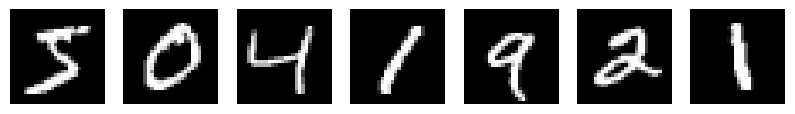

In [3]:

# Load directly from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display some images
plt.figure(figsize=(10, 5))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [4]:
x_train_normalize=X_train.astype("float32")/255.0
x_test_normalize=X_test.astype("float32")/255.0

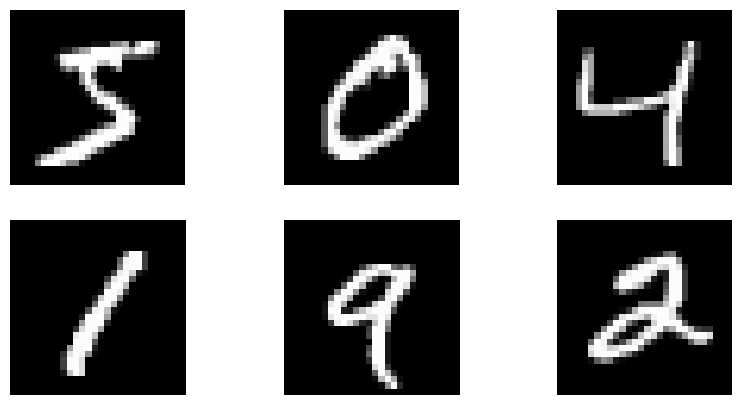

In [ ]:
datagen=ImageDataGenerator(
    rotation_range=30,# rotate up to 30 degrees
    horizontal_flip=True,# randomly flip images horizontally
    vertical_flip=False
)
#add an channel as Image Data Generator expect a 4D tensor with shape 
x_train_normalize = x_train_normalize.reshape((-1, 28, 28, 1))
x_test_normalize=x_test_normalize.reshape((-1, 28, 28, 1))

plt.figure(figsize=(10,5))
for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(x_train_normalize[i], cmap="gray")
        plt.axis("off")
plt.show()

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:

model=models.Sequential([
     # Convolution and Pooling layers
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu',),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3),activation='relu'),
 # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

# the defining the model it need to be compile 
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#traing the model on the train data set
history=model.fit(x_train_normalize,y_train,
                  epochs=10,
                  batch_size=64,
                  validation_data=(x_test_normalize,y_test))
#Evaluate on the test data
test_loss,test_acc=model.evaluate(x_test_normalize,y_test,verbose=2)
print("test Accuracy",test_acc)
print("test loss",test_loss)



d:\Neural-Network-Visualizer-in-3D-using-OpenGL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9520 - loss: 0.1551 - val_accuracy: 0.9853 - val_loss: 0.0468
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9865 - loss: 0.0448 - val_accuracy: 0.9870 - val_loss: 0.0410
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9901 - loss: 0.0314 - val_accuracy: 0.9893 - val_loss: 0.0341
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9918 - val_loss: 0.0263
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9868 - val_loss: 0.0430
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9949 - loss: 0.0149 - val_accuracy: 0.9927 - val_loss: 0.0228
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9924 - val_loss: 0.0268
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9964 - loss: 0.0107 - 

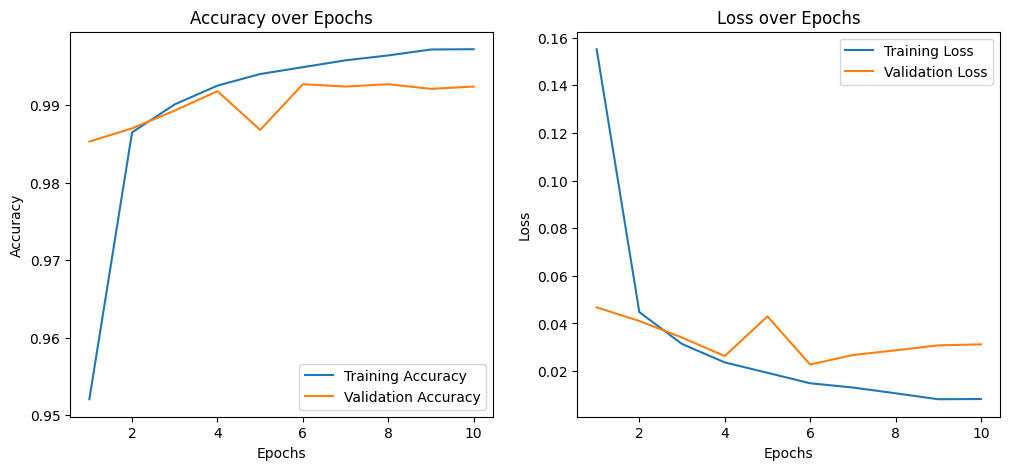

In [16]:
import matplotlib.pyplot as plt

# Extract values from history
acc = history.history['accuracy']            # training accuracy
val_acc = history.history['val_accuracy']    # validation accuracy
loss = history.history['loss']               # training loss
val_loss = history.history['val_loss']       # validation loss

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.show()


Improved model by added dropout layer and using early stoping to avoid overfitting 